In [1]:
#https://www.kaggle.com/trenzalore888/titanic/titanic-learning

In [2]:
#Load data into Pandas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import Series, DataFrame

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
combine = [train, test]

In [4]:
#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Check value count in target variable
objectivecolumn='"Survived"'
print(train["Survived"].value_counts(dropna=False))

0    549
1    342
Name: Survived, dtype: int64


In [7]:
traintotal=(len(train.index))
print("there are", traintotal,"rows in the train data")

testtotal=(len(test.index))
print("there are {} rows in the test data".format(testtotal))

combinetotal=(traintotal+testtotal)
print("there are {} rows in total".format(combinetotal))

there are 891 rows in the train data
there are 418 rows in the test data
there are 1309 rows in total


In [8]:
#Is the data imbalanced

def is_the_data_balanced(df, objectivecolumn):
    objectivecount = df[objectivecolumn][df[objectivecolumn] > 0].sum()
    objectivecountpercentage = (objectivecount/traintotal)*100
    objectivecountrounded = np.ceil(objectivecountpercentage)
    print("Objective accounts for", objectivecountrounded, "percent of the data")

is_the_data_balanced(train, "Survived")

Objective accounts for 39.0 percent of the data


In [9]:
#Where does this value come from ?
Actual_problem_domain_count = 2224

In [10]:
sample_percentage = np.ceil((combinetotal/Actual_problem_domain_count)* 100)
print ("Sample is {} percent of the actual problem".format(sample_percentage))

Sample is 59.0 percent of the actual problem


In [11]:
#Data Summary
print("the objective column is {}".format(objectivecolumn))
print("there are {} rows in the train data".format(traintotal))
print("there are {} rows in the test data".format(testtotal))

print("there are {} rows in total".format(combinetotal))

is_the_data_balanced(train,"Survived")
print("The actual problem data would have{} rows".format(Actual_problem_domain_count))
print ("Sample is {} percent of the actual problem".format(sample_percentage))

the objective column is "Survived"
there are 891 rows in the train data
there are 418 rows in the test data
there are 1309 rows in total
Objective accounts for 39.0 percent of the data
The actual problem data would have2224 rows
Sample is 59.0 percent of the actual problem


In [12]:
#Fixing missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
def null_percentage_calculator(df, nullcolumn):
    df_column_null = df[nullcolumn].isnull().sum()
    df_column_null_percentage = np.ceil((df_column_null /(len(df.index)))*100)
    print("{} percent of {} are NaN values".format(df_column_null_percentage, nullcolumn))

print("Train data nulls:")
null_percentage_calculator(train,"Age")
null_percentage_calculator(train,"Cabin")
null_percentage_calculator(train,"Embarked")

print("Test data nulls:")
null_percentage_calculator(test,"Age")
null_percentage_calculator(test,"Fare")
null_percentage_calculator(test,"Cabin")

Train data nulls:
20.0 percent of Age are NaN values
78.0 percent of Cabin are NaN values
1.0 percent of Embarked are NaN values
Test data nulls:
21.0 percent of Age are NaN values
1.0 percent of Fare are NaN values
79.0 percent of Cabin are NaN values


In [14]:
'''
20.0 percent of Train's Age are NaN values (consider dropping )
78.0 percent of Train's Cabin are NaN values (strongly consider dropping)
1.0 percent of Train's Embarked are NaN values (Worth keeping, best guess with fillna)
TEST NaN values:
21.0 percent of Test's Age are NaN values (Consider dropping)
1.0 percent of Test's Fare are NaN values(worth keeping, best guess)
79.0 percent of Test's Cabin are NaN values(consider dropping)
'''

"\n20.0 percent of Train's Age are NaN values (consider dropping )\n78.0 percent of Train's Cabin are NaN values (strongly consider dropping)\n1.0 percent of Train's Embarked are NaN values (Worth keeping, best guess with fillna)\nTEST NaN values:\n21.0 percent of Test's Age are NaN values (Consider dropping)\n1.0 percent of Test's Fare are NaN values(worth keeping, best guess)\n79.0 percent of Test's Cabin are NaN values(consider dropping)\n"

In [15]:
#Train, Embarked
#low pct of Nulls, so best guess is suitble. Need to find out common values/class
Count_of_each_embarked_classes = train['Embarked'].value_counts(dropna=False)
print (Count_of_each_embarked_classes)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


In [16]:
#Train, Embarked
#Categorical - so have chosen the most frequent value
train['Embarked'] = train['Embarked'].fillna("S")

In [17]:
# Train & Test Cabin : Lots of nulls - so consier dropping
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

In [18]:
#Test, FARE : Worth keeping, best guess
test["Fare"]=test["Fare"].fillna(test["Fare"].median())

In [19]:
#AGE (function as missing in both)
def missing_ages_function(df):
    df.Age = df["Age"].fillna(df["Age"].median())

missing_ages_function(test)
missing_ages_function(train)

In [20]:
#Check to make sure Nulls are now 0
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
#Simplifyin missin data
#Create a vertical column of all the features
#use print(train_df.column.values)

In [22]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Embarked']


In [23]:
#List of features
#PassengerId
#Survived
#Pclass
#Name
#Sex
#Age
#SibSp
#Parch

In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#if STD < 3 -> Categorical
#if STD > 3 -> Numerical

"""
PassengerId -> Large Numbers Unique
Survived -> Small Cat
Pclass -> Small Cat
Name -> Large Cat
Sex -> Small Cat
Age -> Large Num
SibSp -> Small Cat
Parch -> Small Cat
Ticket -> Large Cat
Fare -> Large Num
Cabin -> Large Cat
Embarked -> Small Cat

Ticket -> Alpha Numerical
"""

'\nPassengerId -> Large Numbers Unique\nSurvived -> Small Cat\nPclass -> Small Cat\nName -> Large Cat\nSex -> Small Cat\nAge -> Large Num\nSibSp -> Small Cat\nParch -> Small Cat\nTicket -> Large Cat\nFare -> Large Num\nCabin -> Large Cat\nEmbarked -> Small Cat\n\nTicket -> Alpha Numerical\n'

In [26]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [30]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [31]:
#Based on the pivots, these features should be included in the model
#pclass has significant correlation
#SibSp & Parch have zero co-relation for certain values. It maybe best to derive a feature
#  or set of features from these individual features(creating #1)

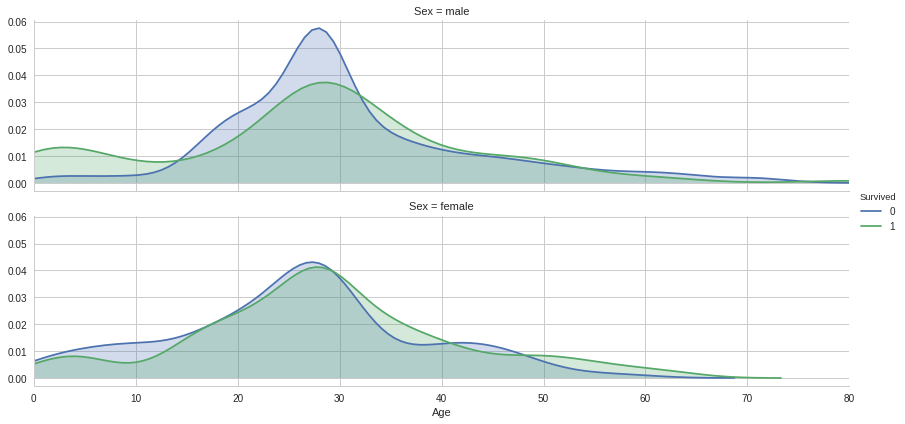

In [32]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col )
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    
plot_distribution(train, var='Age', target='Survived', row='Sex')

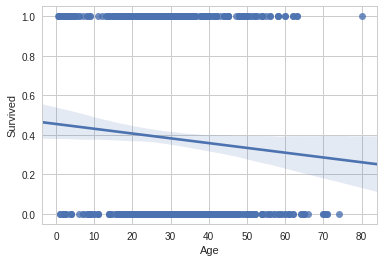

In [33]:
ax = sns.regplot(x='Age', y='Survived', data=train)

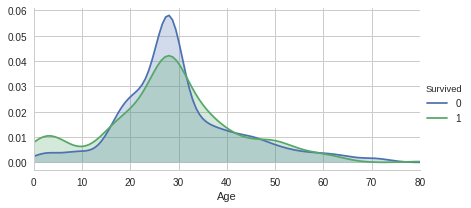

In [34]:
#peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

In [35]:
#Look for pattern in Cabin
#TODO

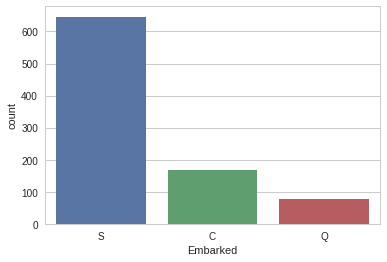

In [36]:
sns.countplot(x='Embarked', data=train)

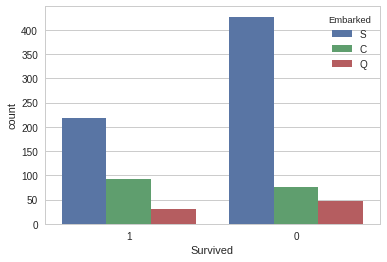

In [37]:
sns.countplot(x='Survived', hue='Embarked', data=train, order=[1,0])

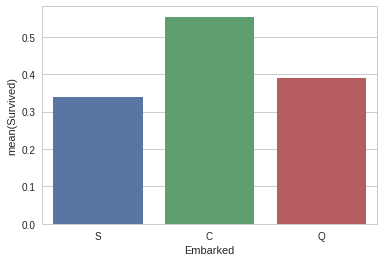

In [38]:
#Embark Perc is the mean/average of those who survived, by embarked
embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])


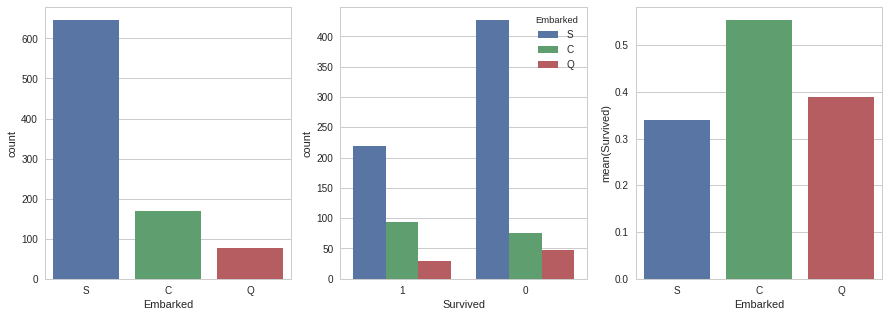

In [39]:
# Can also use this way

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)

embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

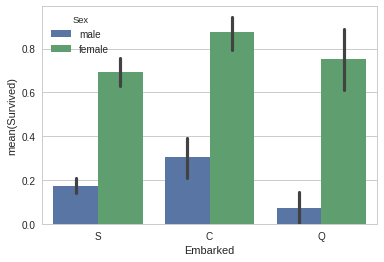

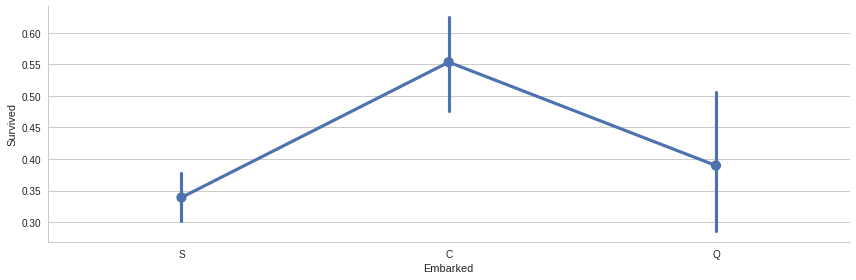

In [40]:
#Visualizing data to determine which variables need to be grouped
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train)
sns.factorplot('Embarked', 'Survived', data=train, size=4, aspect=3)

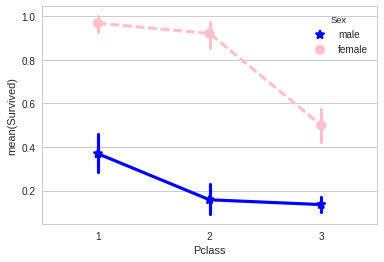

In [41]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [42]:
#Observations - Infants (age <=4), Oldest had high survival rate
#large no of 15-25 year olds did not survive

In [43]:
train['Age3'] = pd.cut(train['Age'], 3)
train[['Age3', 'Survived']].groupby(['Age3'], as_index=False).mean().sort_values(by='Age3', ascending=True)

,Age3,Survived
0,"(0.34, 26.947]",0.407524
1,"(26.947, 53.473]",0.375479
2,"(53.473, 80]",0.320000


In [44]:
train['Age4'] = pd.cut(train['Age'], 4)
train[['Age4', 'Survived']].groupby(['Age4'], as_index=False).mean().sort_values(by='Age4', ascending=True)

,Age4,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80]",0.227273


In [45]:
train['Age5'] = pd.cut(train['Age'], 5)
train[['Age5', 'Survived']].groupby(['Age5'], as_index=False).mean().sort_values(by='Age5', ascending=True)

,Age5,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80]",0.090909


In [46]:
train['Age6'] = pd.cut(train['Age'], 6)
train[['Age6', 'Survived']].groupby(['Age6'], as_index=False).mean().sort_values(by='Age6', ascending=True)

,Age6,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.372038
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80]",0.142857


In [47]:
train['Age7'] = pd.cut(train['Age'], 7)
train[['Age7', 'Survived']].groupby(['Age7'], as_index=False).mean().sort_values(by='Age7', ascending=True)

,Age7,Survived
0,"(0.34, 11.789]",0.573529
1,"(11.789, 23.157]",0.359551
2,"(23.157, 34.526]",0.353659
3,"(34.526, 45.894]",0.417910
4,"(45.894, 57.263]",0.411765
5,"(57.263, 68.631]",0.346154
6,"(68.631, 80]",0.142857


In [48]:
train['Age8'] = pd.cut(train['Age'], 8)
train[['Age8', 'Survived']].groupby(['Age8'], as_index=False).mean().sort_values(by='Age8', ascending=True)

,Age8,Survived
0,"(0.34, 10.367]",0.593750
1,"(10.367, 20.315]",0.382609
2,"(20.315, 30.263]",0.334152
3,"(30.263, 40.21]",0.445161
4,"(40.21, 50.157]",0.383721
5,"(50.157, 60.105]",0.404762
6,"(60.105, 70.0525]",0.235294
7,"(70.0525, 80]",0.200000


In [49]:
train['Age9'] = pd.cut(train['Age'], 9)
train[['Age9', 'Survived']].groupby(['Age9'], as_index=False).mean().sort_values(by='Age9', ascending=True)

,Age9,Survived
0,"(0.34, 9.262]",0.612903
1,"(9.262, 18.104]",0.415584
2,"(18.104, 26.947]",0.333333
3,"(26.947, 35.789]",0.363380
4,"(35.789, 44.631]",0.392157
5,"(44.631, 53.473]",0.415385
6,"(53.473, 62.316]",0.371429
7,"(62.316, 71.158]",0.153846
8,"(71.158, 80]",0.500000


In [50]:
train['Age10'] = pd.cut(train['Age'], 10)
train[['Age10', 'Survived']].groupby(['Age10'], as_index=False).mean().sort_values(by='Age10', ascending=True)

,Age10,Survived
0,"(0.34, 8.378]",0.666667
1,"(8.378, 16.336]",0.413043
2,"(16.336, 24.294]",0.355932
3,"(24.294, 32.252]",0.338150
4,"(32.252, 40.21]",0.440678
5,"(40.21, 48.168]",0.342857
6,"(48.168, 56.126]",0.466667
7,"(56.126, 64.084]",0.375000
8,"(64.084, 72.042]",0.000000
9,"(72.042, 80]",0.500000


In [51]:
train['Age11'] = pd.cut(train['Age'], 11)
train[['Age11', 'Survived']].groupby(['Age11'], as_index=False).mean().sort_values(by='Age11', ascending=True)

,Age11,Survived
0,"(0.34, 7.655]",0.680000
1,"(7.655, 14.889]",0.392857
2,"(14.889, 22.124]",0.346405
3,"(22.124, 29.358]",0.333333
4,"(29.358, 36.593]",0.455882
5,"(36.593, 43.827]",0.371429
6,"(43.827, 51.0618]",0.388060
7,"(51.0618, 58.296]",0.448276
8,"(58.296, 65.531]",0.300000
9,"(65.531, 72.765]",0.000000


In [52]:
train.drop("Age3",axis=1,inplace=True)
train.drop("Age4",axis=1,inplace=True)
train.drop("Age5",axis=1,inplace=True)
train.drop("Age6",axis=1,inplace=True)
train.drop("Age7",axis=1,inplace=True)
train.drop("Age8",axis=1,inplace=True)
train.drop("Age9",axis=1,inplace=True)
train.drop("Age11",axis=1,inplace=True)

In [53]:
#Create functions to simplify data , fill in blanks, drop unnecessary columns
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df  

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

train = transform_features(train)
test = transform_features(test)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age10,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,"(16.336, 24.294]","Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,"(32.252, 40.21]","Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,"(24.294, 32.252]","Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,"(32.252, 40.21]","Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,"(32.252, 40.21]","Allen,",Mr.


In [54]:
len(train)

891

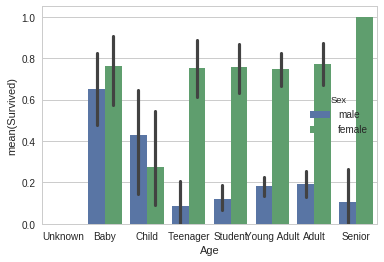

In [55]:
sns.barplot(x='Age', y='Survived', hue='Sex', data=train)

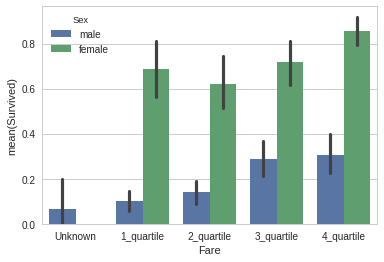

In [56]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=train);

In [57]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
        
    return df_train, df_test

train, test = encode_features(train, test)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age10,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,"(16.336, 24.294]",100,19
1,2,1,1,0,0,1,0,3,"(32.252, 40.21]",182,20
2,3,1,3,0,6,0,0,0,"(24.294, 32.252]",329,16
3,4,1,1,0,6,1,0,3,"(32.252, 40.21]",267,20
4,5,0,3,1,6,0,0,1,"(32.252, 40.21]",15,19


In [58]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Lname          418 non-null int64
NamePrefix     418 non-null int64
dtypes: int64(9)
memory usage: 29.5 KB
None


In [59]:
from sklearn.model_selection import train_test_split

X_all = train.drop(['Survived', 'PassengerId'], axis=1)
y_all = train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#Choose type of classifier
clf = RandomForestClassifier()

#Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

#Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

#Run the grid serch
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the clf to the best combinations of parameters
clf = grid_obj.best_estimator_

#Fit the best algirthm to the data
clf.fit(X_train, y_train)

ValueError: could not convert string to float: '(32.252, 40.21]'